# Tables to Idioms

### Acknowledgement 

Slides created by and for:
<cite>Munzner, T. (2014). Visualization analysis and design. CRC press.</cite> {cite}`munzner2014visualization`

Used by permission of the author. 

Image from:
<cite>Wickham, H. (2010). A layered grammar of graphics. Journal of Computational and Graphical Statistics, 19(1), 3-28.</cite> {cite}`wickham2010layered`

### First the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
data = []
data=pd.read_csv(url)
data = data.dropna() # removed NAs with 0s

### Remove the United States entries

data = data[data.location != "United States"]

data.total_vaccinations = data.total_vaccinations/100000
data.total_distributed = data.total_distributed/100000
data.people_vaccinated = data.people_vaccinated/100000

In [2]:
data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,Alabama,0.84040,3.78975,0.74792,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
3,2021-01-15,Alabama,1.00567,4.44650,0.86956,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
7,2021-01-19,Alabama,1.30795,4.44650,1.14319,0.33,2.67,16346.0,2.33,9.07,7557.0,7523.0,1534.0,0.294
8,2021-01-20,Alabama,1.39200,4.83275,1.21113,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,Alabama,1.65919,4.93125,1.44429,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336


### Acknowledgement 

<cite>Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]</cite>
    
Original Link: https://github.com/owid/covid-19-data (Accessed 3/11/2021)
Source Link: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations 


<cite>Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. IEEE Annals of the History of Computing, 9(03), 90-95.</cite>

### Today's and Yesterday's date and data

In [3]:
from datetime import datetime, timedelta

todaysDate = datetime.today()
yesterdaysDate = todaysDate  - timedelta(days=1)
yesterdaysDate = yesterdaysDate.strftime('%Y-%m-%d')
twoDays = todaysDate - timedelta(days=2)
twoDays = twoDays.strftime('%Y-%m-%d')

data[data.date==yesterdaysDate].head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
128,2021-05-20,Alabama,29.39161,44.15280,17.25694,28.19,59.94,1382327.0,35.20,90.05,33059.0,15330.0,3127.0,0.666
257,2021-05-20,Alaska,5.93159,7.99005,3.25229,38.20,81.08,279464.0,44.46,109.22,2281.0,2027.0,2771.0,0.742
386,2021-05-20,American Samoa,0.41461,0.54030,0.22964,33.50,74.45,18657.0,41.24,97.02,0.0,196.0,3520.0,0.767
515,2021-05-20,Arizona,56.87093,75.77625,32.25461,34.10,78.13,2482237.0,44.31,104.11,23439.0,27137.0,3728.0,0.751
644,2021-05-20,Arkansas,19.91127,27.29400,11.48175,29.65,65.98,894806.0,38.05,90.44,10121.0,8921.0,2956.0,0.730


![Scatterplot Description](scatterplot.PNG)
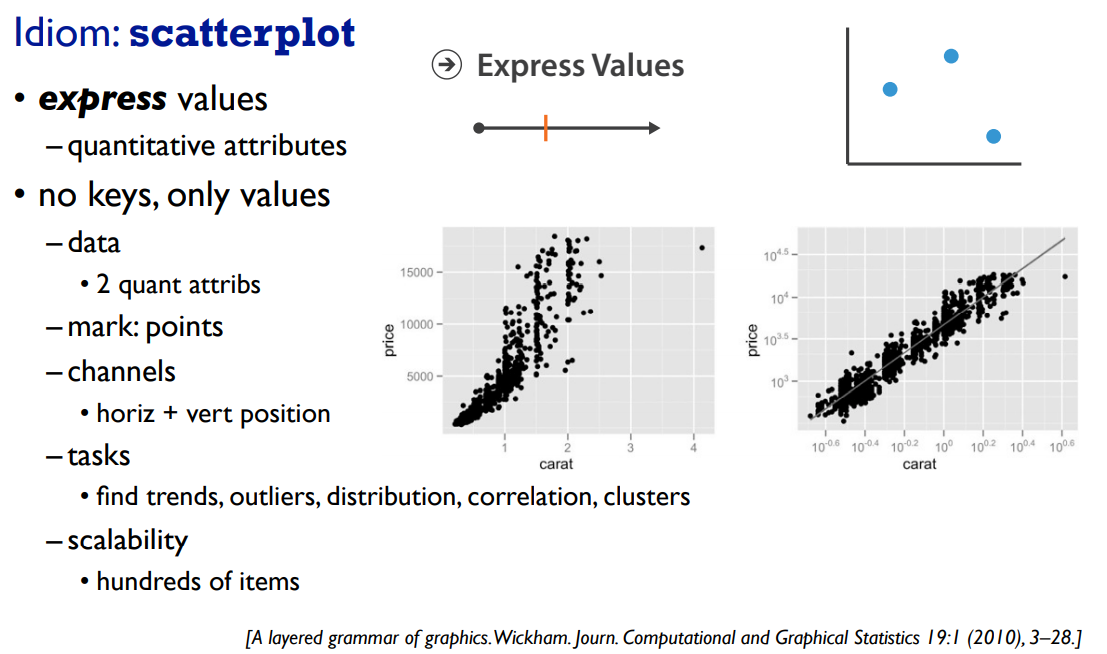

<cite>Scatter Plot — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html. Accessed 14 Mar. 2021.</cite>

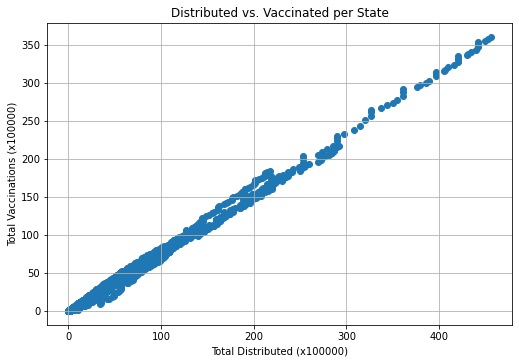

In [4]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(600*px, 400*px))

ax.scatter(data.total_distributed, data.total_vaccinations)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Total Distributed (x100000)' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Distributed vs. Vaccinated per State' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

![Bar Chart Idiom](barchart.PNG)
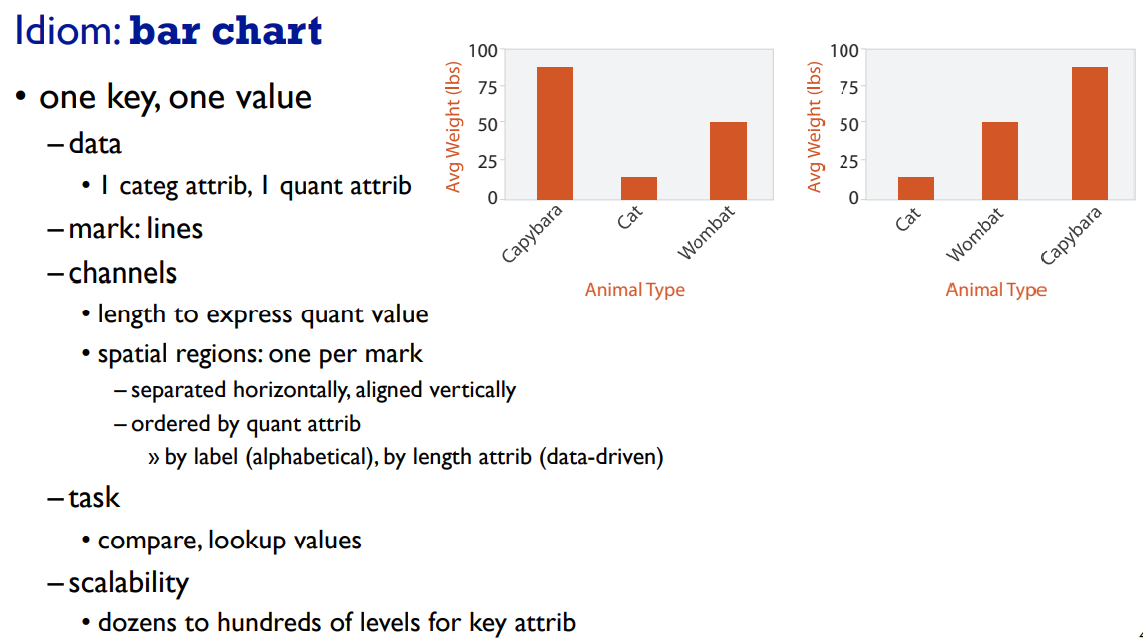

<cite>Grouped Bar Chart with Labels — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html. Accessed 14 Mar. 2021.
</cite>

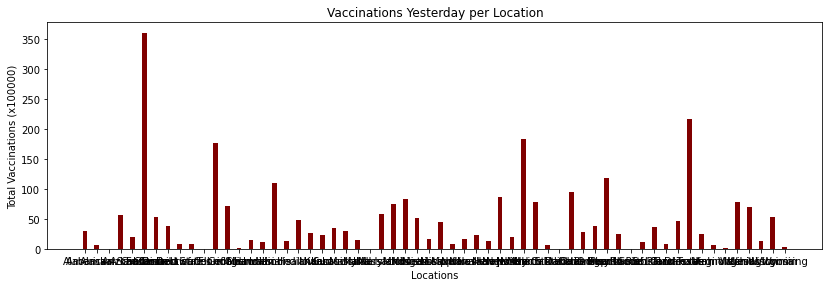

In [5]:
# creating the bar plot
yData = data[data.date==yesterdaysDate]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(yData.location, yData.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

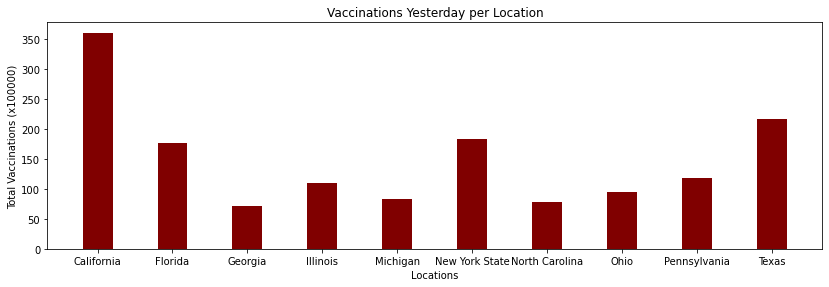

In [6]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

top10Yest = yData[yData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

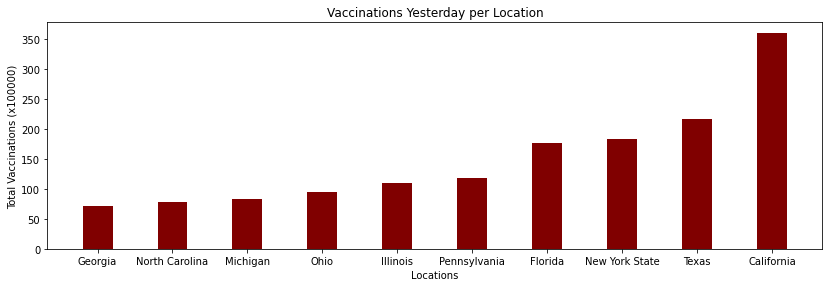

In [7]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )


### Paired Bar Chart

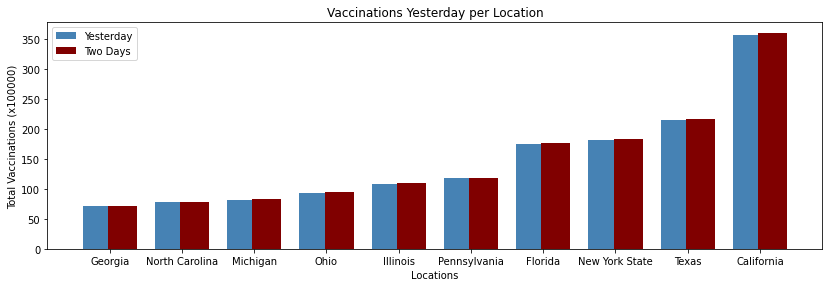

In [8]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Yesterday")
ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Two Days")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

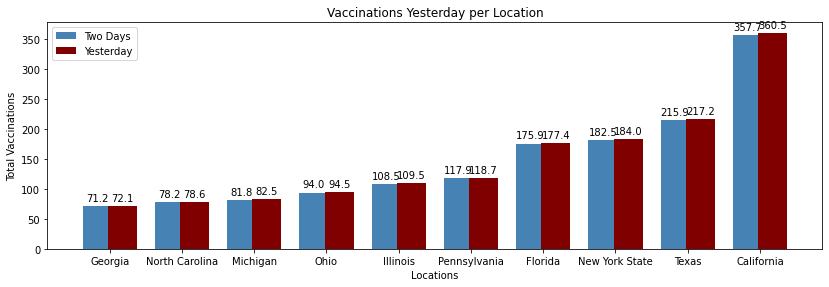

In [9]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
rects1 = ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Two Days")
rects2 = ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Yesterday")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )